In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/iris.data.csv", header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
print("Dataset Head:\n", df.head())
print("\nClass Distribution:\n", df['class'].value_counts())

Dataset Head:
    sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Class Distribution:
 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [5]:
X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [7]:
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")

K=1 -> Accuracy: 0.9778
K=2 -> Accuracy: 0.9778
K=3 -> Accuracy: 1.0000
K=4 -> Accuracy: 0.9778
K=5 -> Accuracy: 1.0000
K=6 -> Accuracy: 1.0000
K=7 -> Accuracy: 1.0000
K=8 -> Accuracy: 1.0000
K=9 -> Accuracy: 1.0000
K=10 -> Accuracy: 1.0000


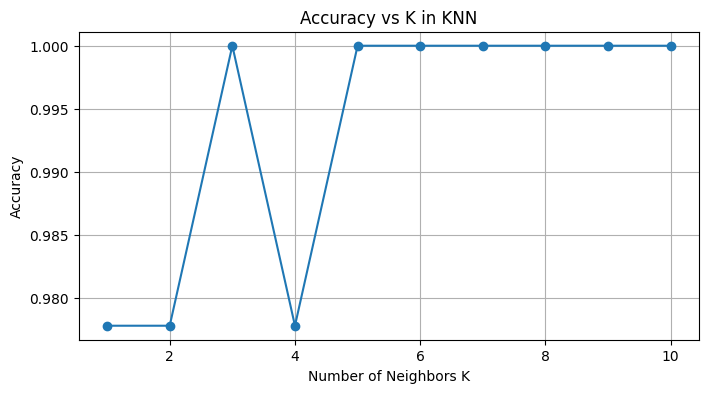

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs K in KNN')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

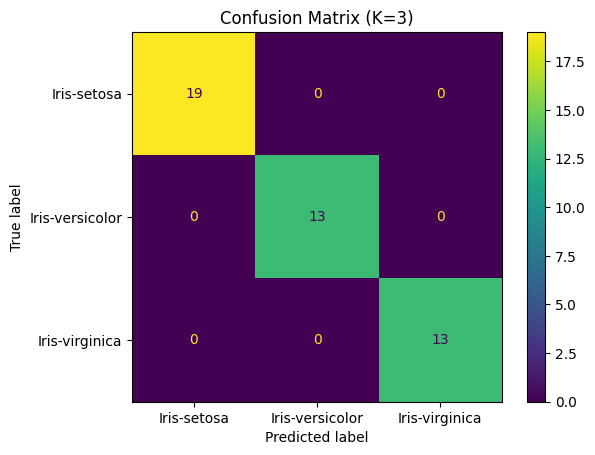

In [9]:
best_k = k_values[np.argmax(accuracies)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=best_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot()
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()
